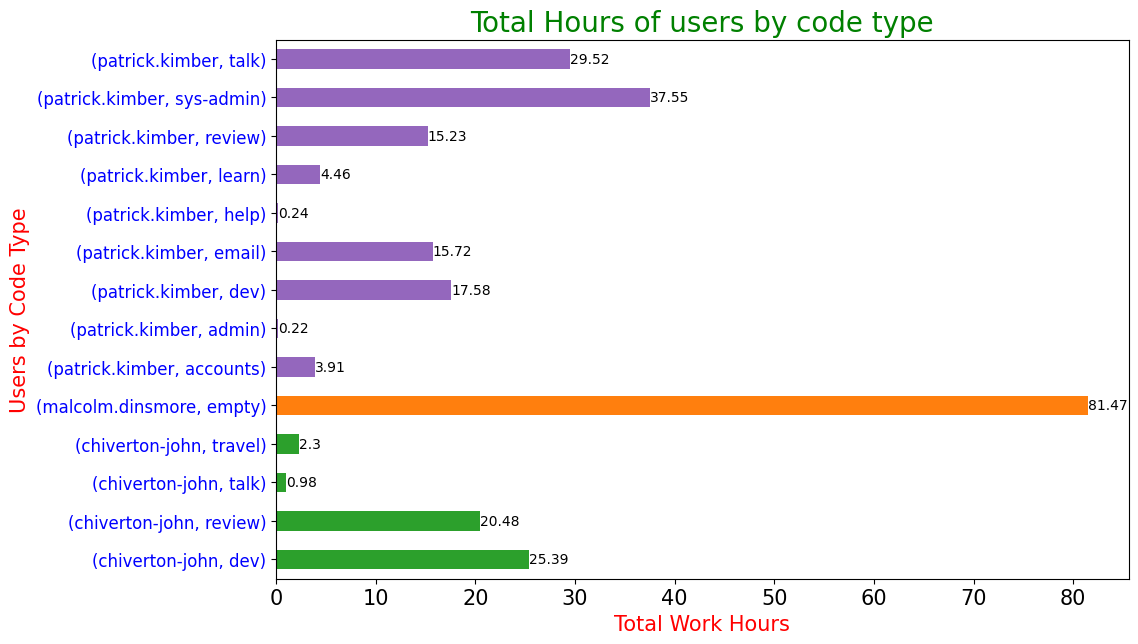

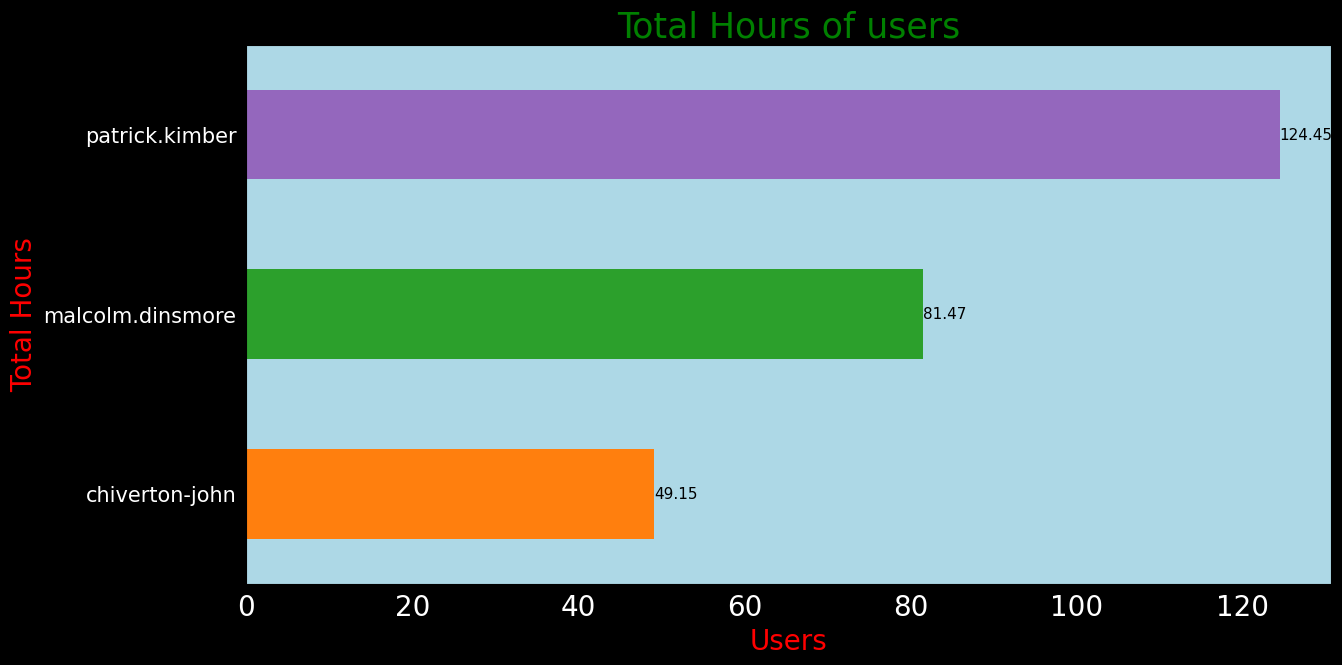

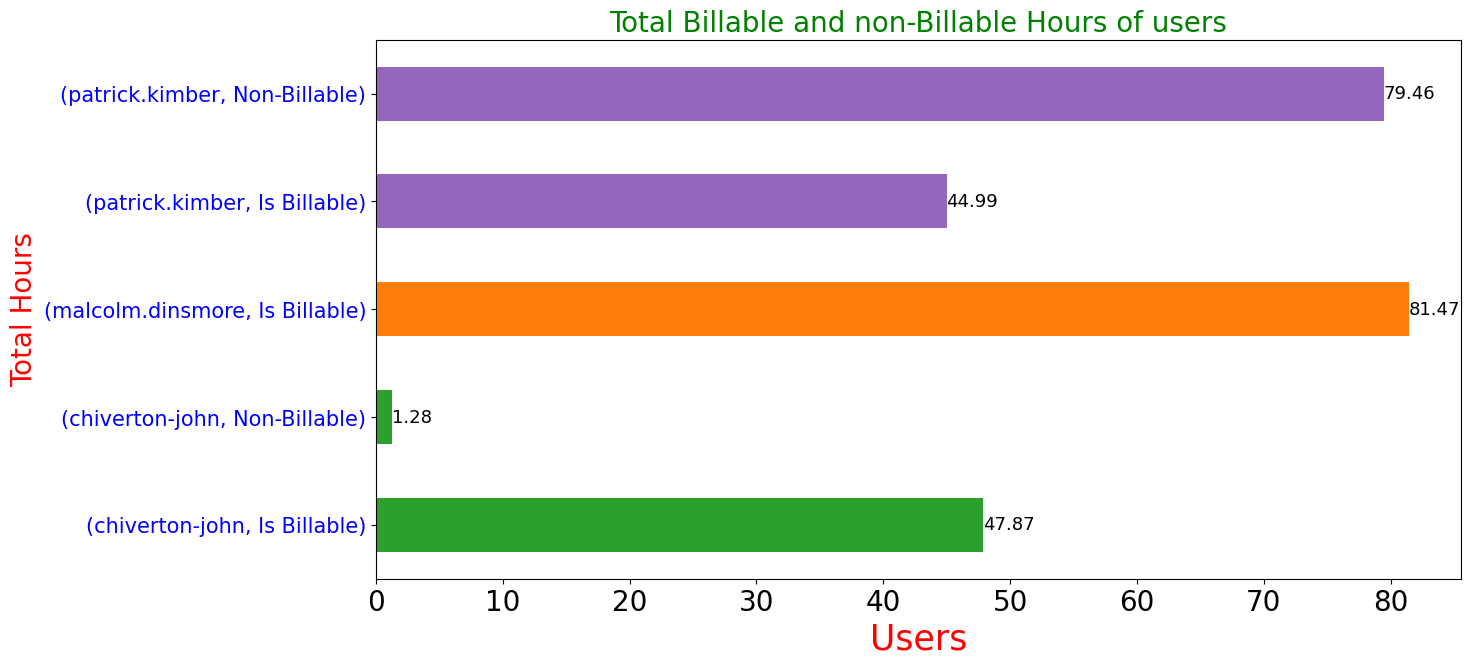

In [4]:
import os, requests, json, pandas as pd, numpy as np, collections, geopandas, matplotlib.pyplot as plt, contextily as cx, matplotlib.ticker as ticker

# Load Data

with open("time-records.csv") as data_file:
    datesPan = pd.read_csv(data_file)

# Check Data

# datesPan.dtypes

# datesPan

# Edit Data

datesPan = datesPan.rename(
    {"Date\tUser\tMinutes\tTicket\tCode\tBillable": "rawdata"}, axis=1
)

datesPan[["Date", "User", "Minutes", "Ticket", "Code", "Billable"]] = datesPan[
    "rawdata"
].str.split("\t", expand=True)

datesPan = datesPan.drop({"rawdata"}, axis=1)

datesPan = datesPan.convert_dtypes()

# datesPan["Date"] = datesPan["Date"].astype("datetime64")
# datesPan["Date"] = datesPan["Date"].dt.date
datesPan["Minutes"] = datesPan["Minutes"].astype("float64")
# datesPan["Ticket"] = datesPan["Ticket"].astype("int64")
datesPan["Billable"] = datesPan["Billable"].replace("True", "Is Billable")
datesPan["Billable"] = datesPan["Billable"].replace("False", "Non-Billable")

datesPan["Code"] = datesPan["Code"].replace("", "empty")

# Compare data

# Table showing total hours and minutes completed by each User With Code field

datesTimesCode = datesPan.groupby(["User", "Code"]).sum(numeric_only="false")

# datesTimesCode["Total Minutes"] = datesTimesCode["Minutes"]

datesTimesCode["Total Hours"] = datesTimesCode["Minutes"] / 60

datesTimesCode["Total Hours"] = datesTimesCode["Total Hours"].astype("float64")

datesTimesCode["Total Hours"] = datesTimesCode["Total Hours"].round(2)

datesTimesCode = datesTimesCode.drop({"Minutes"}, axis=1)

# Table showing total hours and minutes completed by each User without Code field

datesTimes = datesPan.groupby(["User"]).sum(numeric_only="false")

datesTimes["Total Minutes"] = datesTimes["Minutes"]

datesTimes["Total Hours"] = datesTimes["Minutes"] / 60

datesTimes["Total Hours"] = datesTimes["Total Hours"].round(2)

datesTimes.drop({"Minutes"}, axis=1, inplace=True)

#  Table showing Billable and nonBillable time completed by each User

datesBills = datesPan.groupby(["User", "Billable"]).sum(numeric_only="false")

datesBills["Total Hours"] = datesBills["Minutes"] / 60

datesBills["Total Hours"] = datesBills["Total Hours"].round(2)

datesBills["Total Billable Hours"] = datesBills["Total Hours"]

datesBills.drop({"Minutes", "Total Hours"}, axis=1, inplace=True)

# Charts showing the above.

# Make Graphs

# Graph of Total Work Hours of Users with Code field

fig, axP1 = plt.subplots()
ax1 = datesTimesCode["Total Hours"].plot(
    kind="barh",
    figsize=(11, 7),
    legend=False,
    color=[
        "C2",
        "C2",
        "C2",
        "C2",
        "C1",
        "C4",
        "C4",
        "C4",
        "C4",
        "C4",
        "C4",
        "C4",
        "C4",
        "C4",
    ],
    ax=axP1,
    yticks=(np.arange(0, 100, step=10)),
)
ax1.bar_label(ax1.containers[0])
ax1.set_title("Total Hours of users by code type", fontsize=20).set_color(
    "green"
)
ax1.xaxis.set_label_text("Total Work Hours", fontsize=15).set_color("red")
ax1.yaxis.set_label_text("Users by Code Type", fontsize=15).set_color("red")
plt.yticks(fontsize="12", color="Blue")
plt.xticks(fontsize="15")
plt.savefig(
    "static/images/graphs/totalhourscodetype_qdMGahT.png",
    bbox_inches="tight",
)
plt.show()

# Graph of Total Work Hours of Users

fig, axP2 = plt.subplots(facecolor="black")
ax2 = datesTimes["Total Hours"].plot(
    y="Total Hours",
    kind="barh",
    figsize=(14, 7),
    rot=0,
    legend=False,
    color=["C1", "C2", "C4"],
    ax=axP2,
    yticks=(np.arange(0, 140, step=10)),
)
ax2.bar_label(ax2.containers[0], fontsize=11)
ax2.set_title("Total Hours of users", fontsize=25).set_color("green")
ax2.xaxis.set_label_text("Users", fontsize=20).set_color("red")
ax2.yaxis.set_label_text("Total Hours", fontsize=20).set_color("red")
ax2.set_facecolor("lightblue")
plt.yticks(fontsize="15", color="White")
plt.xticks(fontsize="20", color="White")
plt.savefig(
    "static/images/graphs/totalhours_f5BovJC.png",
    bbox_inches="tight",
)
plt.show()

# Graph of Total Work Hours of Users with billable hours

fig, axP3 = plt.subplots()
ax3 = datesBills["Total Billable Hours"].plot(
    kind="barh",
    figsize=(14, 7),
    rot=0,
    legend=False,
    color=["C2", "C2", "C1", "C4", "C4"],
    ax=axP3,
    yticks=(np.arange(0, 140, step=10)),
)
ax3.bar_label(ax3.containers[0], fontsize=13)
ax3.set_title(
    "Total Billable and non-Billable Hours of users", fontsize=20
).set_color("green")
ax3.xaxis.set_label_text("Users", fontsize=25).set_color("red")
ax3.yaxis.set_label_text("Total Hours", fontsize=20).set_color("red")
plt.yticks(fontsize="15", color="blue")
plt.xticks(fontsize="20")
plt.savefig(
    "static/images/graphs/totalbillable_47qvxZ1.png",
    bbox_inches="tight",
)
plt.show()

# Check and Display Data

# datesPan.dtypes

# datesTimes

# datesTimesCode

# datesTimesCodeGraph

# datesBills

# Write data to file

datesPan.to_csv("basepandastimerecords.csv", index=False)
datesTimesCode.to_csv("totalhourscode.csv")
datesTimes.to_csv("totalhours.csv")
datesBills.to_csv("totalhoursbills.csv")